In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from numpy import genfromtxt
dataset = genfromtxt('Dataset.csv', delimiter = ',', dtype = float)
dataset

array([[-2.58 ,  0.661],
       [-3.195,  0.463],
       [ 1.437, -1.386],
       ...,
       [-2.706,  2.652],
       [-2.763,  2.755],
       [-0.508,  1.537]])

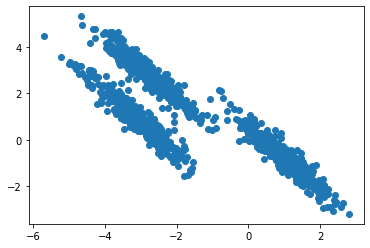

In [4]:
plt.scatter(dataset[:, 0], dataset[:, 1])

Enter the number of clusters you require: 3
Enter 1 if supplying initial centroid co-ords, else 0: 0
SSE of iteration number  1 :  6246.943159085593


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


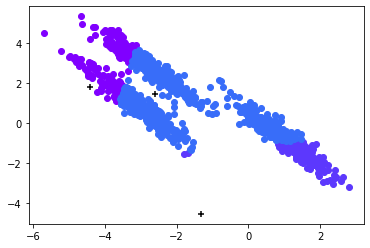

SSE of iteration number  2 :  1519.1439559246826


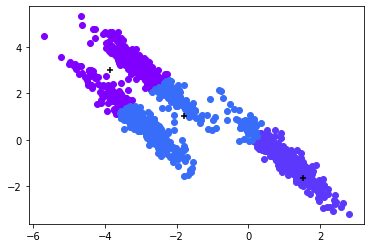

SSE of iteration number  3 :  1160.9046061810946


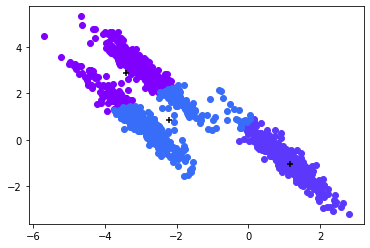

SSE of iteration number  4 :  1122.0588395149832


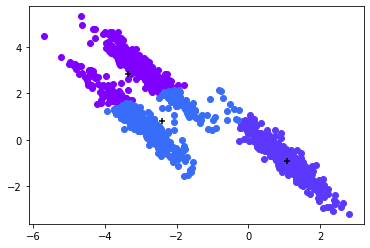

SSE of iteration number  5 :  1116.3925676144195


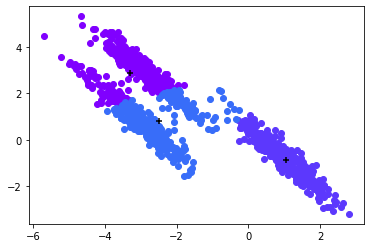

SSE of iteration number  6 :  1116.2286654763955


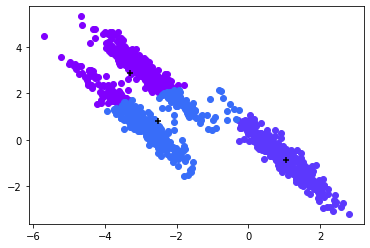

SSE of iteration number  7 :  1116.2193177711742


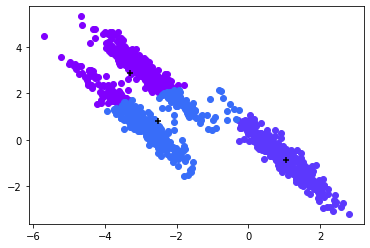

SSE of iteration number  8 :  1116.2193177711742


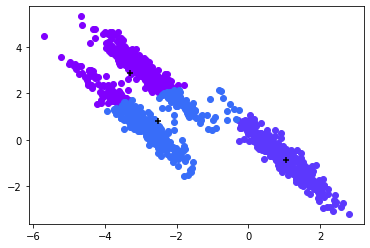

SSE of iteration number  9 :  1116.2193177711742


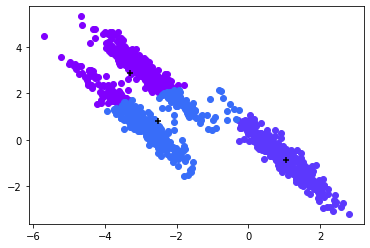

SSE of iteration number  10 :  1116.2193177711742


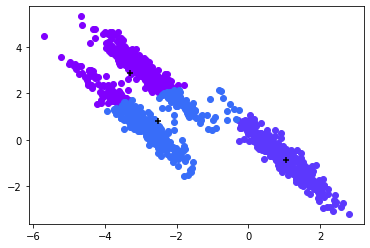

SSE of iteration number  11 :  1116.2193177711742


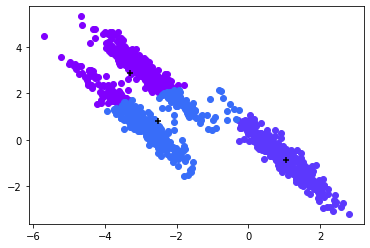

SSE of iteration number  12 :  1116.2193177711742


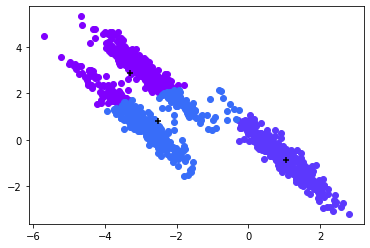

SSE of iteration number  13 :  1116.2193177711742


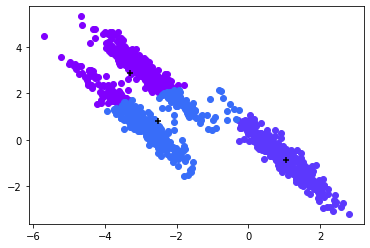

SSE of iteration number  14 :  1116.2193177711742


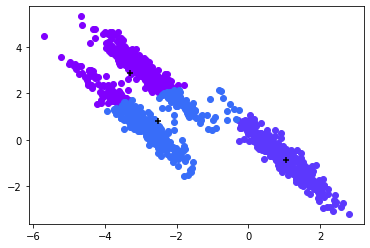

SSE of iteration number  15 :  1116.2193177711742


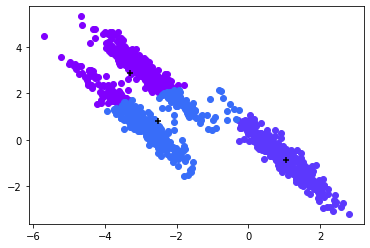

(a) Final centroids:  [[-3.30339359  2.88697959]
 [ 1.04187888 -0.86774534]
 [-2.5272209   0.797     ]]
(b) Cluster label of each datapoint:  [2. 2. 1. 1. 2. 1. 1. 0. 2. 1. 2. 0. 0. 2. 0. 0. 2. 2. 2. 0. 0. 2. 2. 2.
 2. 2. 0. 2. 1. 2. 1. 2. 2. 0. 2. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 2. 2. 0.
 0. 0. 1. 2. 1. 0. 2. 2. 0. 0. 2. 0. 2. 0. 2. 0. 0. 0. 0. 1. 2. 1. 0. 1.
 1. 0. 0. 0. 0. 2. 1. 2. 2. 1. 0. 2. 1. 1. 2. 0. 2. 1. 0. 1. 0. 2. 1. 2.
 2. 2. 2. 0. 2. 0. 1. 2. 0. 0. 1. 2. 0. 2. 0. 0. 2. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 2. 2. 1. 2. 1. 1. 2. 1. 1. 0. 2. 0. 2. 0. 1. 1. 2. 1. 1. 2. 0. 0.
 1. 2. 2. 0. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 2. 2. 0. 0. 2. 1. 1. 0. 1. 0. 2. 1. 2. 0.
 2. 1. 2. 0. 0. 1. 0. 2. 2. 1. 0. 1. 2. 0. 2. 0. 2. 0. 2. 2. 0. 0. 0. 0.
 1. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 0. 0. 0. 0. 1. 2.
 1. 1. 1. 2. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 2. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 2. 2. 1. 2. 0. 0. 0. 0. 0. 0. 1. 2. 0. 2. 0. 1. 1. 2. 

In [21]:
#1 and 4(a) combined (3 clusters visually identified by plotting)

SSElist = []
cntlist = []

x = np.arange(15)
ys = [i + x + (i * x) ** 2 for i in range(15)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))

def SSE(dataset, centroids, assignments):
  ans = 0
  for i in range(dataset.shape[0]):
    ans += (np.linalg.norm(centroids[int(assignments[i]), :] - dataset[i, :]) ** 2)
  return ans

def select(dataset, centroids):
  new_assignments = np.zeros(dataset.shape[0])
  for i in range(dataset.shape[0]):
    dist = 200
    for j in range(centroids.shape[0]):
      new_dist = np.linalg.norm(centroids[j, :] - dataset[i, :])
      if (new_dist < dist):
        new_assignments[i] = j
        dist = new_dist
  return new_assignments

def partition(dataset, assignments, k):
  lst_lst = []
  for i in range(k):
    lst = []
    for j in range(len(assignments)):
      if (int(assignments[j]) == i):
        lst.append([dataset[j][0], dataset[j][1]])
    lst = np.array(lst)
    lst_lst.append(lst)
  lst_lst = np.array(lst_lst)
  return lst_lst

def compute(dataset, centroids, assignments):
  new_centroids = np.zeros([centroids.shape[0], 2])
  cnt = np.zeros(centroids.shape[0])
  for i in range(dataset.shape[0]):
    j = int(assignments[i])
    cnt[j] += 1
    new_centroids[j, :] += dataset[i, :]
  for i in range(new_centroids.shape[0]):
    if (cnt[i]):
      new_centroids[i, :] /= cnt[i]
    else:
      new_centroids[i, :] = centroids[i, :]
  return new_centroids

def KMeans(dataset, k, centroids, iterations):
  SSElist.clear()
  cntlist.clear()
  dataset = np.array(dataset)
  centroids = np.array(centroids)
  assignments = np.zeros(dataset.shape[0])
  curr = 0
  start = 0
  cnt = 1
  while (iterations):
    if (start):
      centroids = compute(dataset, centroids, assignments)
    else:
      start = 1
    assignments = select(dataset, centroids)
    l = partition(dataset, assignments, k)
    curr = SSE(dataset, centroids, assignments)
    cntlist.append(cnt)
    SSElist.append(curr)
    iterations -= 1
    print('SSE of iteration number ', cnt, ': ', curr)
    for i in range(k):
      points = l[i]
      if (points.any()):
        plt.scatter(points[:, 0], points[:, 1], color = colors[i])
    plt.scatter(centroids[:, 0], centroids[:, 1], c = 'black', marker = '+')
    plt.pause(0.1)
    cnt += 1
  print('(a) Final centroids: ', centroids)
  print('(b) Cluster label of each datapoint: ', assignments)
  print('(c) SSE: ', curr)

k = int(input('Enter the number of clusters you require: '))
enter = int(input('Enter 1 if supplying initial centroid co-ords, else 0: '))
centroids = []
if (enter):
  print('Enter your initial centroid co-ords: ')
  for i in range(k):
    x, y = map(float, input().split())
    centroids.append([x, y])
else:
  for i in range(k):
    centroids.append([np.random.uniform(-5, 5), np.random.uniform(-5, 5)])
KMeans(dataset, k, centroids, 15)

#the clusters aren't exactly what we expect

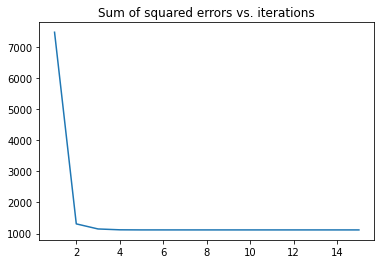

In [7]:
plt.title('Sum of squared errors vs. iterations')
plt.plot(cntlist, SSElist)

In [8]:
#2a

pts = []
for i in range(20):
  pts.append([np.random.uniform(-1, 1), 0])
  pts.append([np.random.uniform(-0.5, 1.5), 0])

c1 = [[-0.1, 0], [0.1, 0]]
c2 = [[0, 0], [3.5, 0]]

SSE of iteration number  1 :  16.208313440634893


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


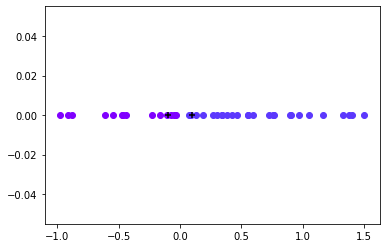

SSE of iteration number  2 :  5.96817713360004


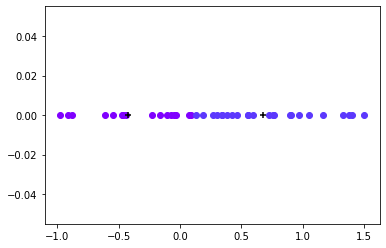

SSE of iteration number  3 :  5.7301998806108285


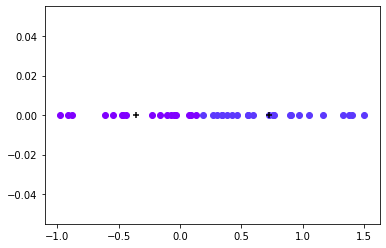

SSE of iteration number  4 :  5.657287846798625


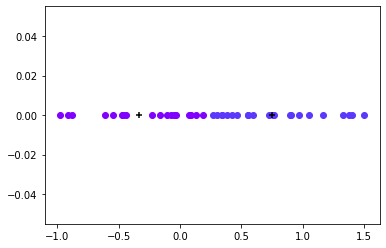

SSE of iteration number  5 :  5.62788337067545


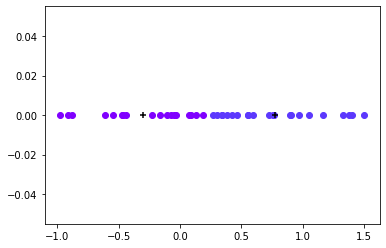

SSE of iteration number  6 :  5.62788337067545


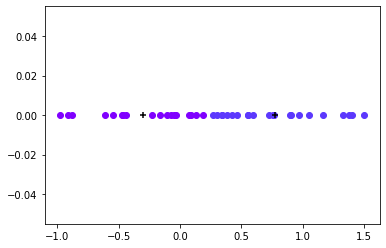

SSE of iteration number  7 :  5.62788337067545


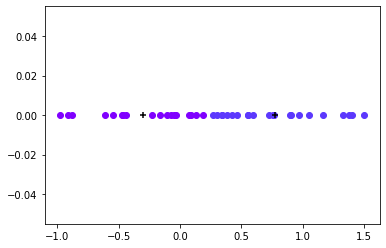

SSE of iteration number  8 :  5.62788337067545


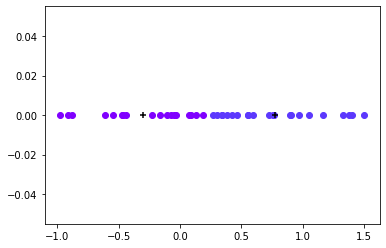

SSE of iteration number  9 :  5.62788337067545


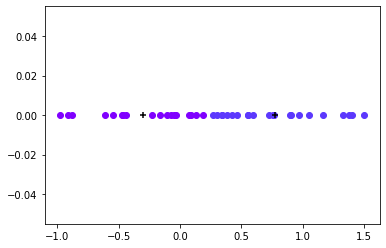

SSE of iteration number  10 :  5.62788337067545


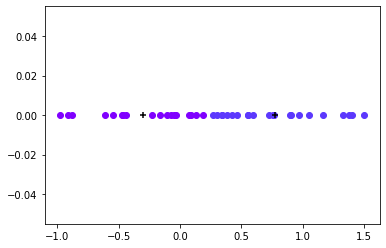

(a) Final centroids:  [[-0.30377656  0.        ]
 [ 0.77513416  0.        ]]
(b) Cluster label of each datapoint:  [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
(c) SSE:  5.62788337067545


In [9]:
KMeans(pts, 2, c1, 10)

SSE of iteration number  1 :  20.507252062588496


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


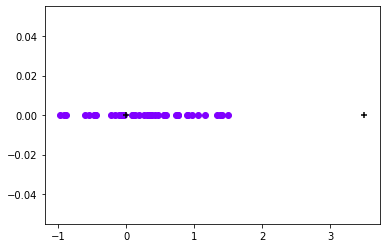

SSE of iteration number  2 :  17.151961897872546


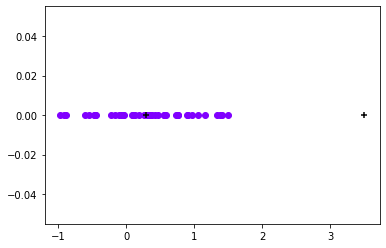

SSE of iteration number  3 :  17.151961897872546


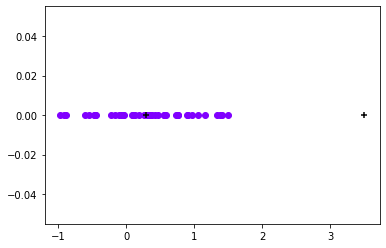

SSE of iteration number  4 :  17.151961897872546


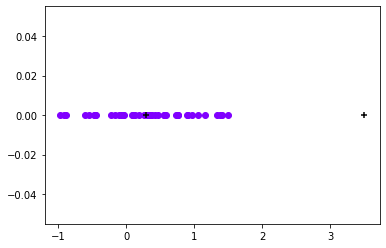

SSE of iteration number  5 :  17.151961897872546


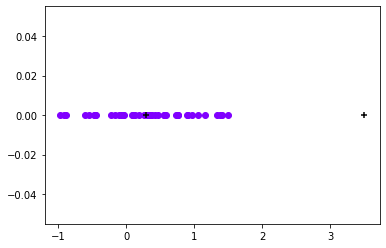

SSE of iteration number  6 :  17.151961897872546


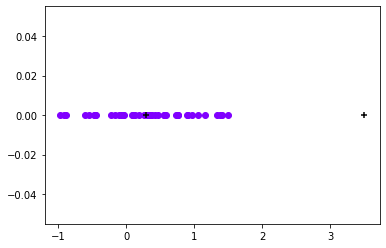

SSE of iteration number  7 :  17.151961897872546


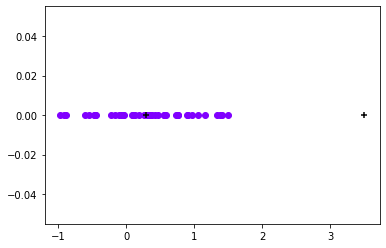

SSE of iteration number  8 :  17.151961897872546


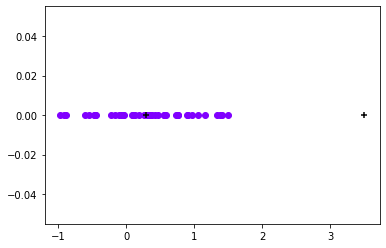

SSE of iteration number  9 :  17.151961897872546


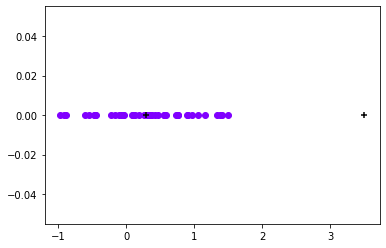

SSE of iteration number  10 :  17.151961897872546


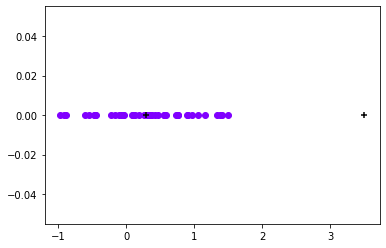

(a) Final centroids:  [[0.28962433 0.        ]
 [3.5        0.        ]]
(b) Cluster label of each datapoint:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(c) SSE:  17.151961897872546


In [10]:
KMeans(pts, 2, c2, 10)

In [11]:
#2b
pts.append([np.random.uniform(3, 4), 0])

SSE of iteration number  1 :  27.33316448616933


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


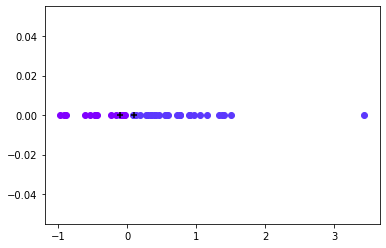

SSE of iteration number  2 :  12.931363195306819


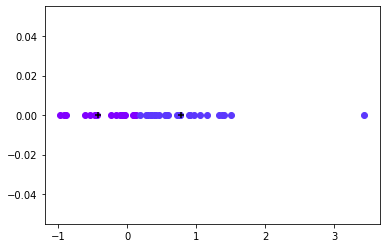

SSE of iteration number  3 :  12.431957068490075


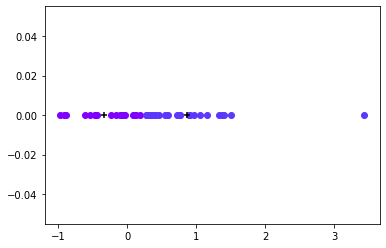

SSE of iteration number  4 :  12.328367782534446


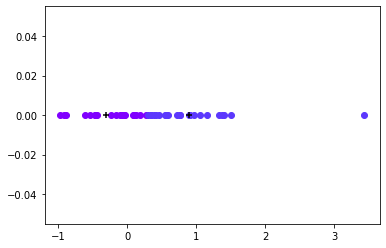

SSE of iteration number  5 :  12.241493991256874


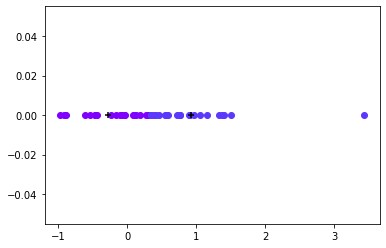

SSE of iteration number  6 :  12.15932658589064


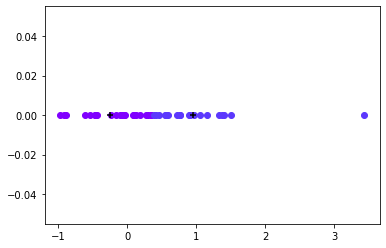

SSE of iteration number  7 :  11.95668943854551


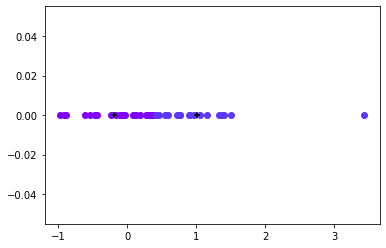

SSE of iteration number  8 :  11.873141302359679


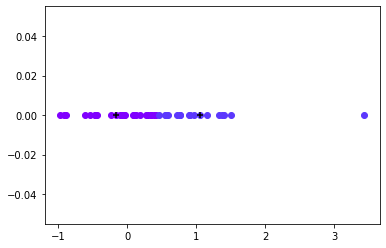

SSE of iteration number  9 :  11.820731613160941


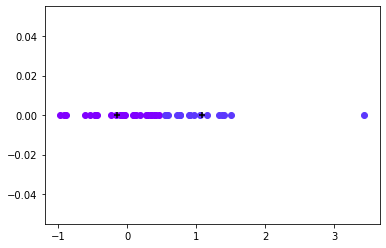

SSE of iteration number  10 :  11.782009115708007


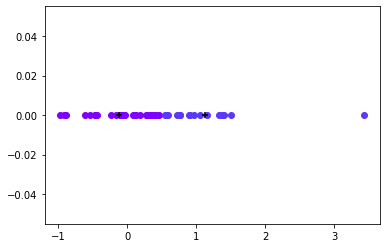

(a) Final centroids:  [[-0.11793058  0.        ]
 [ 1.12303946  0.        ]]
(b) Cluster label of each datapoint:  [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
(c) SSE:  11.782009115708007


In [12]:
KMeans(pts, 2, c1, 10)

SSE of iteration number  1 :  20.51142603830175


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


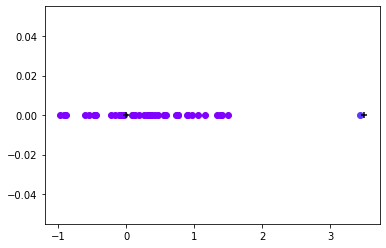

SSE of iteration number  2 :  17.151961897872546


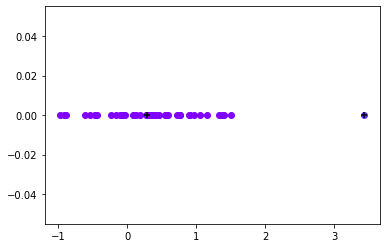

SSE of iteration number  3 :  17.151961897872546


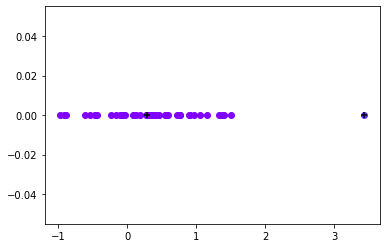

SSE of iteration number  4 :  17.151961897872546


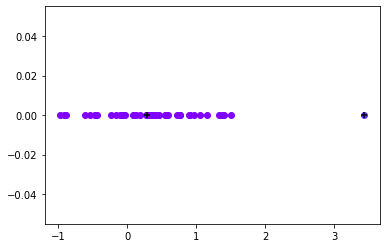

SSE of iteration number  5 :  17.151961897872546


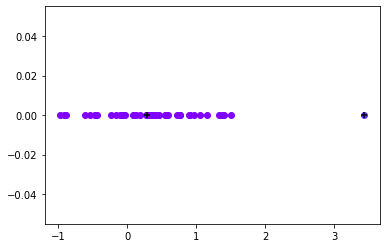

SSE of iteration number  6 :  17.151961897872546


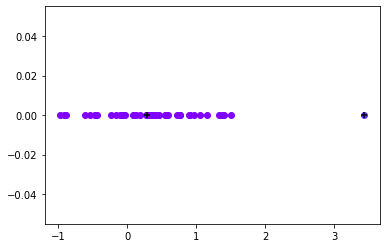

SSE of iteration number  7 :  17.151961897872546


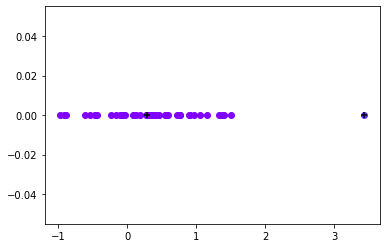

SSE of iteration number  8 :  17.151961897872546


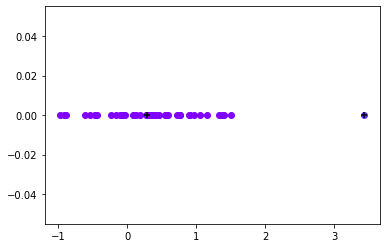

SSE of iteration number  9 :  17.151961897872546


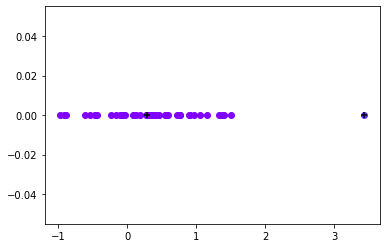

SSE of iteration number  10 :  17.151961897872546


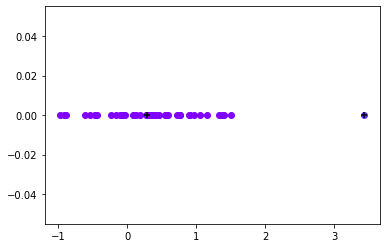

(a) Final centroids:  [[0.28962433 0.        ]
 [3.43539369 0.        ]]
(b) Cluster label of each datapoint:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(c) SSE:  17.151961897872546


In [13]:
KMeans(pts, 2, c2, 10)
#clusters aren't found correctly here

In [14]:
#3

indv = []
for i in range(100):
  indv.append([np.random.normal(5, 1.1), np.random.normal(60, 7)])
for i in range(100):
  indv.append([np.random.normal(3, 1), np.random.normal(30, 5)])
for i in range(50):
  indv.append([np.random.normal(7, 1), np.random.normal(40, 2)])

In [15]:
sz = int(input('Enter the number of initial centroid points: '))

Enter the number of initial centroid points: 3


SSE of iteration number  1 :  45231.7060577783


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


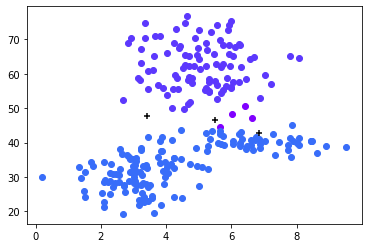

SSE of iteration number  2 :  8896.110129094228


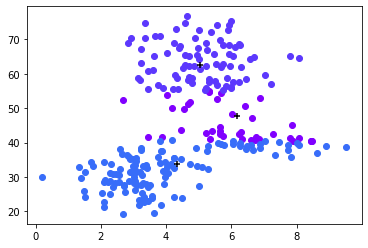

SSE of iteration number  3 :  7684.7169103508395


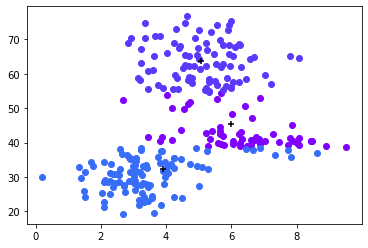

SSE of iteration number  4 :  6735.38332391779


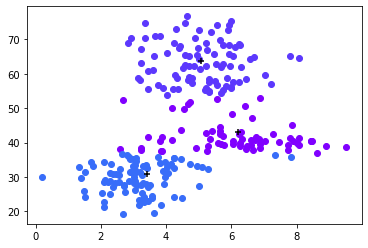

SSE of iteration number  5 :  6471.19670904367


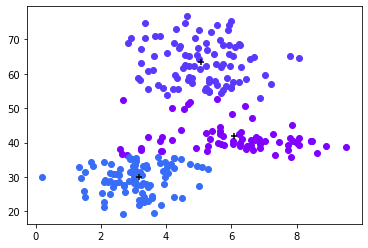

SSE of iteration number  6 :  6420.466226383581


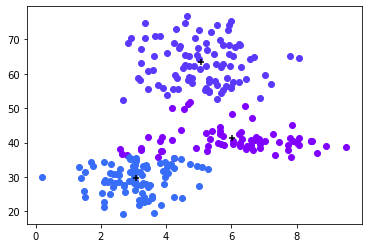

SSE of iteration number  7 :  6388.624551994571


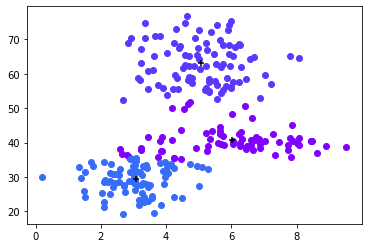

SSE of iteration number  8 :  6377.745235755298


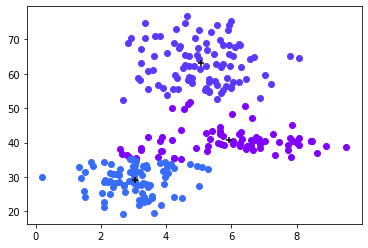

SSE of iteration number  9 :  6376.808563341338


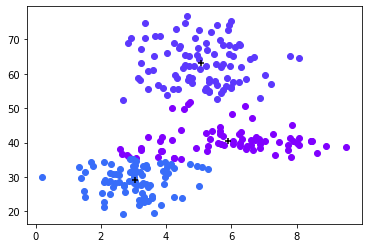

SSE of iteration number  10 :  6376.808563341338


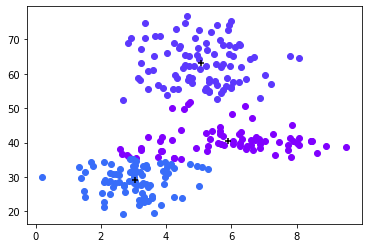

(a) Final centroids:  [[ 5.8895545  40.60973521]
 [ 5.05739675 63.11530399]
 [ 3.03445895 29.17648104]]
(b) Cluster label of each datapoint:  [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 0.
 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 2. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(c) SSE:  6376.808563341338


In [16]:
#3b
c3_1 = []
for i in range(sz):
  c3_1.append([np.random.uniform(3, 7), np.random.uniform(40, 60)])
KMeans(indv, 3, c3_1, 10)

SSE of iteration number  1 :  41808.27577719174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


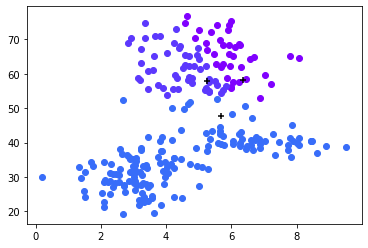

SSE of iteration number  2 :  9632.294033739272


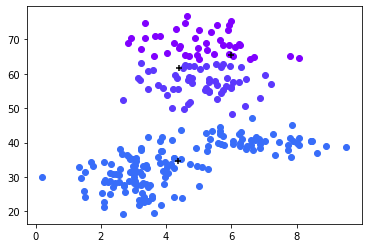

SSE of iteration number  3 :  7850.1791570836895


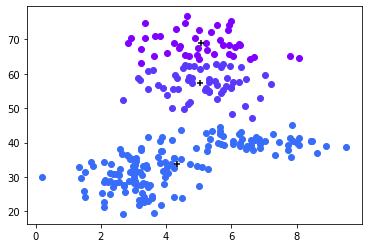

SSE of iteration number  4 :  7843.278830040653


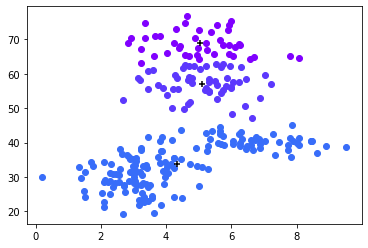

SSE of iteration number  5 :  7843.278830040653


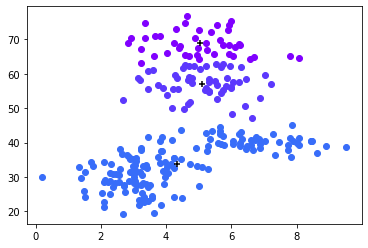

SSE of iteration number  6 :  7843.278830040653


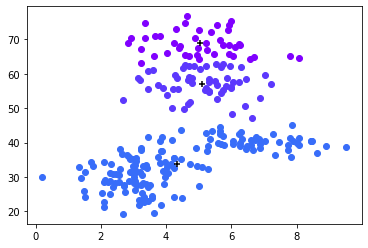

SSE of iteration number  7 :  7843.278830040653


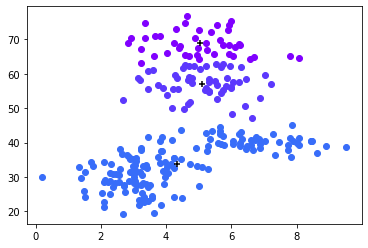

SSE of iteration number  8 :  7843.278830040653


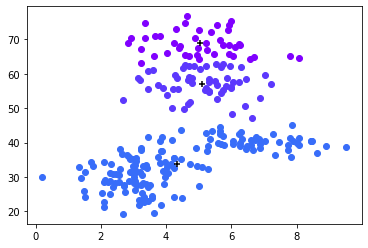

SSE of iteration number  9 :  7843.278830040653


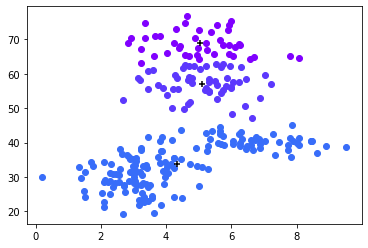

SSE of iteration number  10 :  7843.278830040653


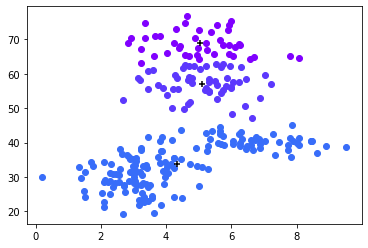

(a) Final centroids:  [[ 5.03591221 68.86054007]
 [ 5.10648775 57.05379713]
 [ 4.32777846 33.81812529]]
(b) Cluster label of each datapoint:  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 2. 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
(c) SSE:  7843.278830040653


In [18]:
#3b ctd.
c3_2 = []
for i in range(sz):
  c3_2.append([np.random.uniform(3, 7), np.random.uniform(40, 60)])
KMeans(indv, 3, c3_2, 10)
#3c - we can select an appropriate clustering based on the SSEs obtained - the lower, the better.
#3d - Narrowing / reducing the randomisation of the initial centroids should decrease the chances of obtaining different results over successive runs.

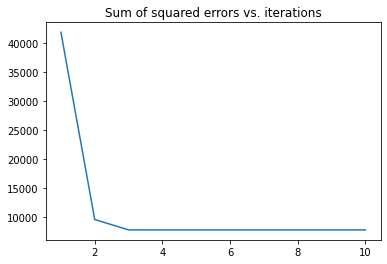

In [19]:
#3a
plt.title('Sum of squared errors vs. iterations')
plt.plot(cntlist, SSElist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


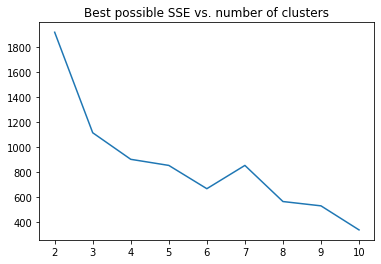

In [20]:
#4b

iter_cnt = []
best_SSE = []

def KMeans_but_you_only_want_the_SSE(dataset, k, centroids, iterations):
  dataset = np.array(dataset)
  centroids = np.array(centroids)
  assignments = np.zeros(dataset.shape[0])
  curr = 0
  start = 0
  while (iterations):
    if (start):
      centroids = compute(dataset, centroids, assignments)
    else:
      start = 1
    assignments = select(dataset, centroids)
    l = partition(dataset, assignments, k)
    curr = SSE(dataset, centroids, assignments)
    iterations -= 1
  best_SSE.append(curr)

for i in range(9):
  iter_cnt.append(i + 2)
  cen = []
  for j in range(i + 2):
    cen.append([np.random.uniform(-5, 5), np.random.uniform(-5, 5)])
  KMeans_but_you_only_want_the_SSE(dataset, k, cen, 20)

plt.title('Best possible SSE vs. number of clusters')
plt.plot(iter_cnt, best_SSE)

#We can select a good value of k by looking at locations where bending (relatively low decrease in SSE for higher values of k) occurs in the generated SSE vs. k graph.